# combine TNG50 and TNG100

> StellarMassCorrection: Correction (dex) between the uncorrected TNG stellar masses and the corrected stellar masses at fixed halo mass, set to ensure that the TNG50 SHMR matches TNG100 on average, at least for stellar masses that are reasonably well sampled.  Do SubhaloMassType_stars + StellarMassCorrection to get the corrected stellar mass. 

> MagnitudeCorrection: Same as stellar mass correction but in (mag) for fluxes and surface brightnesses. You should be able to apply these directly to the Sersic_mag and SB1kpc parameters, for example. Do Sersic_mag + MagnitudeCorrection to get corrected magnitudes. 

In [7]:
import os
import numpy as np

from haloflow import util as U

from astropy.table import Table, vstack

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

# read TNG50 and TNG100

In [3]:
tng50 = Table.read('/scratch/gpfs/chhahn/haloflow/hf2/hf2.TNG50.morph_subhalo.csv')
tng100 = Table.read('/scratch/gpfs/chhahn/haloflow/hf2/hf2.TNG100.morph_subhalo.csv')

Text(0.95, 0.05, 'No correction')

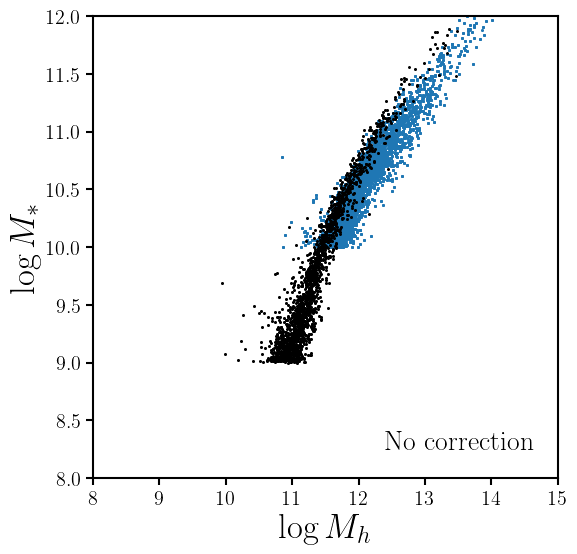

In [4]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

sub.scatter(tng100['SubhaloMassType_dm'], tng100['SubhaloMassType_stars'], c='C0', s=1, label='TNG100')
sub.scatter(tng50['SubhaloMassType_dm'], tng50['SubhaloMassType_stars'], c='k', s=0.5, label='TNG50')

sub.set_xlabel(r'$\log M_h$', fontsize=25)
sub.set_xlim(8, 15)
sub.set_ylabel(r'$\log M_*$', fontsize=25)
sub.set_ylim(8, 12)
sub.text(0.95, 0.05, 'No correction', ha='right', va='bottom', transform=sub.transAxes, fontsize=20)

# read corrected masses

In [5]:
tng50 = Table.read('/scratch/gpfs/chhahn/haloflow/hf2/hf2.TNG50_corr.morph_subhalo.csv')

Text(0.95, 0.05, 'TNG50 Corrected')

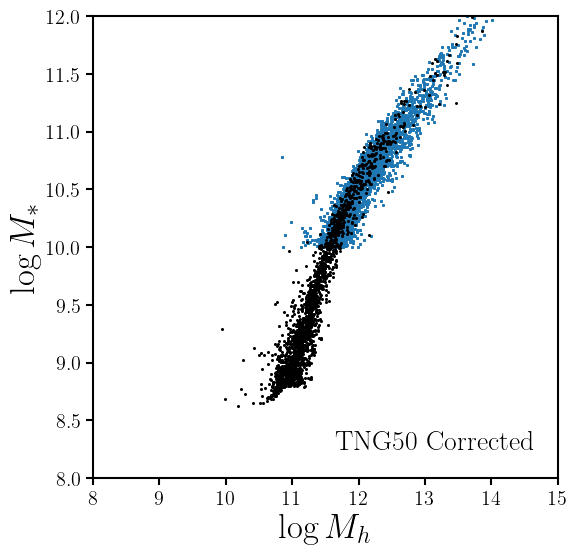

In [6]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

sub.scatter(tng100['SubhaloMassType_dm'], tng100['SubhaloMassType_stars'], c='C0', s=1, label='TNG100')
sub.scatter(tng50['SubhaloMassType_dm'], tng50['SubhaloMassType_stars'], c='k', s=0.5, label='TNG50')

sub.set_xlabel(r'$\log M_h$', fontsize=25)
sub.set_xlim(8, 15)
sub.set_ylabel(r'$\log M_*$', fontsize=25)
sub.set_ylim(8, 12)
sub.text(0.95, 0.05, 'TNG50 Corrected', ha='right', va='bottom', transform=sub.transAxes, fontsize=20)

# compile the TNGs 

In [8]:
tng_all = vstack([tng100, tng50])

Text(0.95, 0.05, 'TNG50 Corrected')

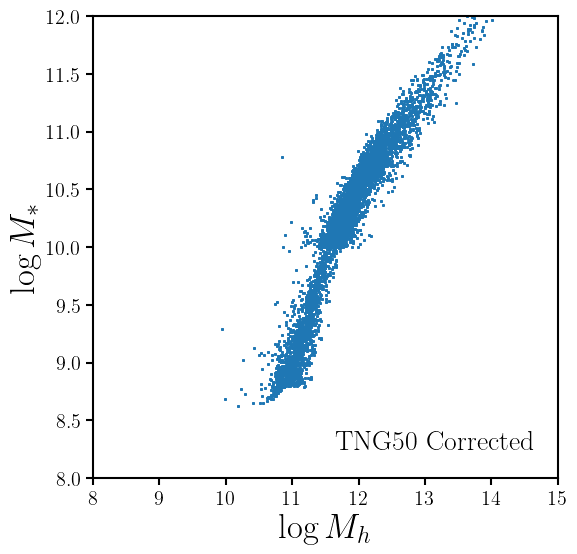

In [9]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

sub.scatter(tng_all['SubhaloMassType_dm'], tng_all['SubhaloMassType_stars'], c='C0', s=1, label='TNG-All')

sub.set_xlabel(r'$\log M_h$', fontsize=25)
sub.set_xlim(8, 15)
sub.set_ylabel(r'$\log M_*$', fontsize=25)
sub.set_ylim(8, 12)
sub.text(0.95, 0.05, 'TNG50 Corrected', ha='right', va='bottom', transform=sub.transAxes, fontsize=20)

In [10]:
tng_all.write('/scratch/gpfs/chhahn/haloflow/hf2/hf2.TNG_ALL.morph_subhalo.csv')